![](https://pptwinpics.oss-cn-beijing.aliyuncs.com/CDA%E8%AE%B2%E5%B8%88%E6%B0%B4%E5%8D%B0_20200314161940.png)


大家好，我是 CDA 曹鑫。

我的 Github 地址：https://github.com/imcda 。

我的邮箱：caoxin@cda.cn 。

这节课跟大家讲讲 Matplotlib。
# 参考

matplotlib 中文网： https://www.matplotlib.org.cn/gallery/text_labels_and_annotations/annotation_demo.html

# 前言

当你在网上搜索答案的时候，你会遇到各种实现的方法，如果你只是单纯的把找到的答案copypaste，那总有一天你会和我一样崩溃。感觉自己就是个没有谷哥就不会画图的傻子。。。

所以，如果你：

学习matplotlib的时候是从标题类似于"五分钟教你matplotlib画图” 这种教程开始的
起码知道这一句 'import matplotlib.pyplot as plt'
遇到稍微复杂的细节就要一顿查，遇到修改xy坐标，名称，等等就头大
打开matplotlib的官方指南，不止一次，但是一脸懵逼
在这几个词 figure, axes, axis 在matplotlib出现时就一脸完了的表情
那么你不是一个人。我一直和你在一起。

所以这份指南是用来（尝试）解决这个问题的。我们花短短的时间，来从根本上了解一下matplotlib的架构，各种名词是什么意思，一个正常的画图程序是什么。

# `plt.***` 和 `ax.***`的区别
我认为所有不先讲清楚`plt.***`和`ax.***` 两种画图方式的区别的教程都是耍流氓。一上来就告诉你，`plt.figure()`, `plt.plot()`, `plt.show()`，这么画就对了的，都是不负责任的表现！

## 在matplotlib中，有两种画图方式：
**`plt.figure()`**： `plt.***`系列。通过`plt.xxx` 来画图，其实是取了一个捷径。这是通过matplotlib提供的一个api，这个plt提供了很多基本的function可以让你很快的画出图来，但是如果你想要更细致的精调，就要使用另外一种方法。

In [1]:
# 如果想要图片可调节，可以用这个
# %matplotlib notebook
# 如果只是想展示在 Jupyter Notebook
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号

import pandas as pd
import numpy as np

A = np.arange(1,5)
B = A**2
C = A**3

print(A)
print(B)

[1 2 3 4]
[ 1  4  9 16]


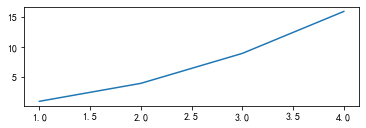

In [2]:
plt.figure(1)

# 行，列，个数
plt.subplot(211)   
plt.plot(A,B)   
plt.show()

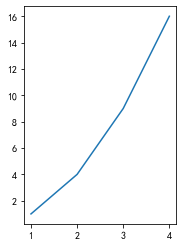

In [3]:
A = [1,2,3,4]
B = [1,4,9,16]

plt.figure(1)  
plt.subplot(121)
plt.plot(A,B)   
plt.show()

`fig, ax = plt.subplots()`: 这个就是正统的稍微复杂一点的画图方法了。指定figure和axes，然后对axes单独操作。等下就讲figure和axes都神马意思。

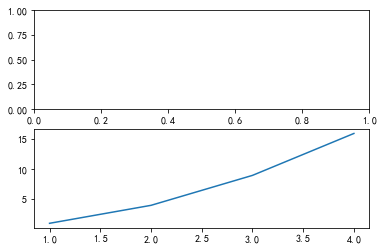

In [4]:
# 行，列
fig, ax = plt.subplots(2)   
ax[1].plot(A,B)

大部分的新手教程，都是以`plt.xxx`开始的。我个人认为这不是一个很好的方式。的确, `plt.xxx`简单易懂上手快，但是plt把matplotlib的结构看成一个blackbox，新手在不知道这个lib到底是如何运作的情况下以为自己上手了，可是当你需要细调你的图的时候，你就发现你完全不明白网上的人为什么要用`ax.xxx`， 为什么还有其他那么多种方式来加题目。这样的学习过程是非常不利于长期发展的。
因此，从我这个傻子的经验，我强烈建议在初学matplotlib的时候，尽量避免使用`plt.xxx`系列。当你明白`figure/axes/axis`都是控制什么的时候，如果你想要简单的制作一个quick and dirty的图，用`plt.xxx`才是OK。

# 名词解释 in matplotlib
matplotlib的名词定于对于非英语母语的人来说实在是太不友好了。尤其是axes。仰天长啸。

从官方借了个图:

![matplotlib-1](https://pptwinpics.oss-cn-beijing.aliyuncs.com/matplotlib-1_20191129203615.png)

+ `Figure fig = plt.figure()`: 可以解释为画布。
    + 画图的第一件事，就是创建一个画布figure，然后在这个画布上加各种元素。

+ `Axes ax = fig.add_subplot(1,1,1)`: 不想定义，没法定义，就叫他axes！
    + 首先，这个不是你画图的xy坐标抽！
    + 希望当初写这个lib的时候他们用一个更好的名字。。。
    + 可以把axes理解为你要放到画布上的各个物体。比如你要画一个太阳，一个房子，一个车在画布上，那么太阳是一个axes，房子是一个axes，etc。
    + 如果你的figure只有一张图，那么你只有一个axes。如果你的figure有subplot，那么每一个subplot就是一个axes
    + axes是matlibplot的宇宙中心！axes下可以修改编辑的变量非常多，基本上能包含你的所有需求。
+ `Axis ax.xaxis/ax.yaxis`: 对，这才是你的xy坐标轴。
    + 每个坐标轴实际上也是由竖线和数字组成的，每一个竖线其实也是一个axis的subplot，因此ax.xaxis也存在axes这个对象。对这个axes进行编辑就会修改xaxis图像上的表现。
    
# 图像的各个部位名称
再从使用指南 [User Guide](https://link.zhihu.com/?target=https%3A//matplotlib.org/tutorials/introductory/usage.html) 借个图。每个部分的名称指南，这样当你想修改一个部位的时候，起码知道关键字啊。

![matplotlib-2](https://pptwinpics.oss-cn-beijing.aliyuncs.com/matplotlib-2_20191129203903.png)

## 一步一步来，用传统方法画个图
下面就是实战。用调取ax的方式来画个图。不要用plt！！

### 首先，搞个画布
我喜欢用这个命令来开始画图。哪怕你没有subplot，也可以用这个subplots来创建一个画布。

这个function创建了一个大小为（14，7）的画布，把这个画布赋值给变量fig，同时在这个画布上创建了一个axes，把这个axes赋值给ax。这样，所有未来的`fig.xxx`都是对这个画布的操作，所有`ax.xxx`都是对这个axes的操作。

如果你有两个图，那么ax是一个有两个元素`ax[0]`,`ax[1]` 的list。`ax[0]`就对应第一个subplot的ax。

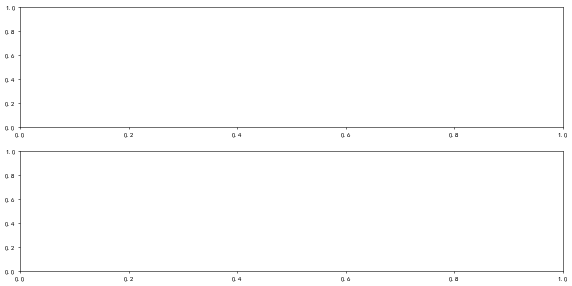

In [5]:
# figsize表示画板的大小，dpi为图形的分辨率
# fig, ax = plt.subplots(figsize=(14,7))
fig, ax = plt.subplots(2,1,figsize=(14,7),dpi=50)
# ax[0].***
# ax[1].***

### 好了画布搞好了，画数据。
注意，我们这里依然不使用plt！因为我们要在这个axes上画数据，因此就用ax.plot()来画。画完第一个再call一次，再画第二个。

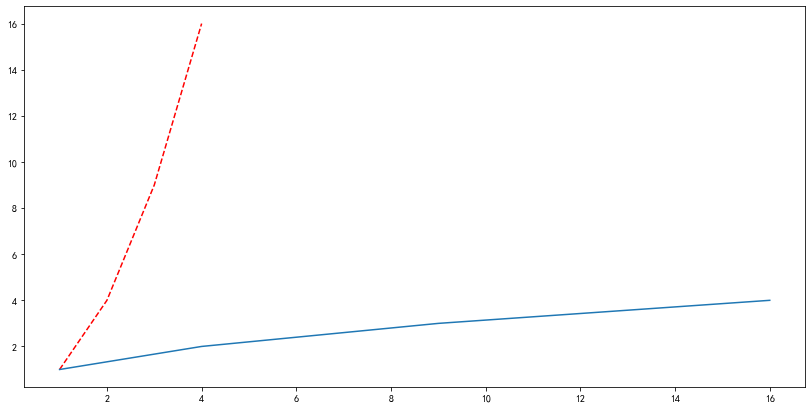

In [6]:
fig, ax = plt.subplots(figsize=(14,7))
# fig, ax = plt.subplots(2,1,figsize=(14,7))
# ax[0].***
# ax[1].***

# color为线的颜色，linestyle为线的形状
ax.plot(A,B,label='1', color="r",linestyle = "--")
ax.plot(B,A,label='2')

### 下面开始细节的处理
数据画好了就可以各种细调坐标轴啊，tick啊之类的。

首先把标题和xy坐标轴的标题搞定。Again, 不用plt。直接在axes上进行设定。

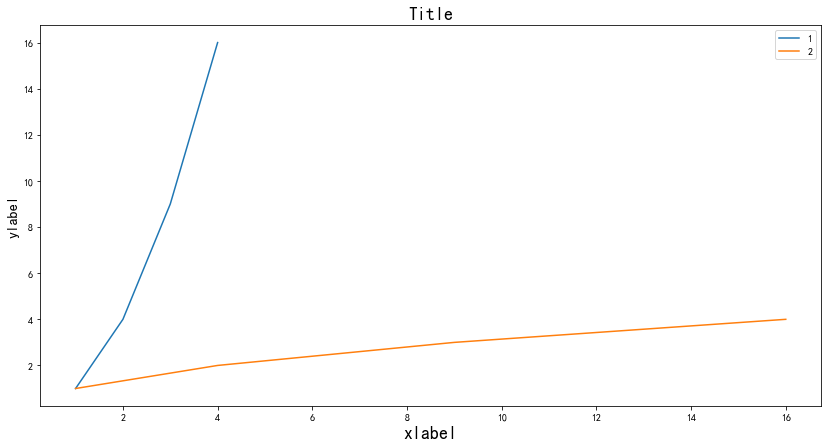

In [7]:
fig, ax = plt.subplots(figsize=(14,7))
# fig, ax = plt.subplots(2,1,figsize=(14,7))
# ax[0].***
# ax[1].***

ax.plot(A,B,label='1')
ax.plot(B,A,label='2')

ax.set_title('Title',fontsize=18)
ax.set_xlabel('xlabel', fontsize=18,fontfamily = 'sans-serif',fontstyle='italic')
ax.set_ylabel('ylabel', fontsize='x-large',fontstyle='oblique')
ax.legend()

然后是xy坐标轴的一些属性设定, 也是在axes level上完成的

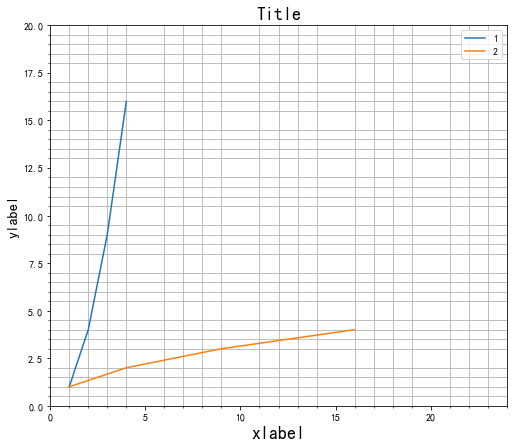

In [8]:
fig, ax = plt.subplots(figsize=(14,7))
# fig, ax = plt.subplots(2,1,figsize=(14,7))
# ax[0].***
# ax[1].***

ax.plot(A,B, label='1')
ax.plot(B,A, label='2')

ax.set_title('Title',fontsize=18)
ax.set_xlabel('xlabel', fontsize=18,fontfamily = 'sans-serif',fontstyle='italic')
ax.set_ylabel('ylabel', fontsize='x-large',fontstyle='oblique')
ax.legend()

ax.set_aspect('equal') 
ax.minorticks_on() 
ax.set_xlim(0,24) 
ax.set_ylim(0,20) 
ax.grid(which='minor', axis='both')

最后是坐标轴tick和细节，这个在axes.xaxis or axes.yaxis上完成。

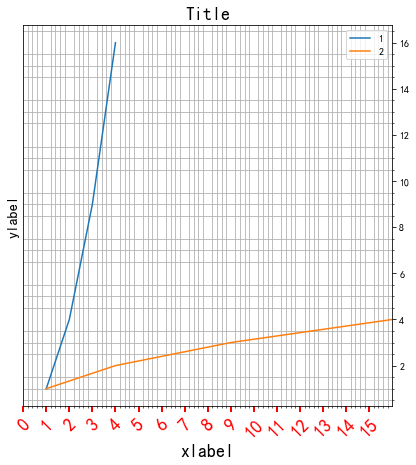

In [9]:
fig, ax = plt.subplots(figsize=(14,7))
# fig, ax = plt.subplots(2,1,figsize=(14,7))
# ax[0].***
# ax[1].***

ax.plot(A,B, label='1')
ax.plot(B,A, label='2')

ax.set_title('Title',fontsize=18)
ax.set_xlabel('xlabel', fontsize=18,fontfamily = 'sans-serif',fontstyle='italic')
ax.set_ylabel('ylabel', fontsize='x-large',fontstyle='oblique')
ax.legend()

ax.set_aspect('equal') 
ax.minorticks_on() 
ax.set_xlim(0,16) 
ax.grid(which='minor', axis='both')

ax.xaxis.set_tick_params(rotation=45,labelsize=18,colors='w')
ax.xaxis.set_tick_params(direction='out', length=6, width=2, colors='r',
               grid_color='r', grid_alpha=0.5)
start, end = ax.get_xlim() 
ax.xaxis.set_ticks(np.arange(start, end,1)) 
ax.yaxis.tick_right()

# 折线图

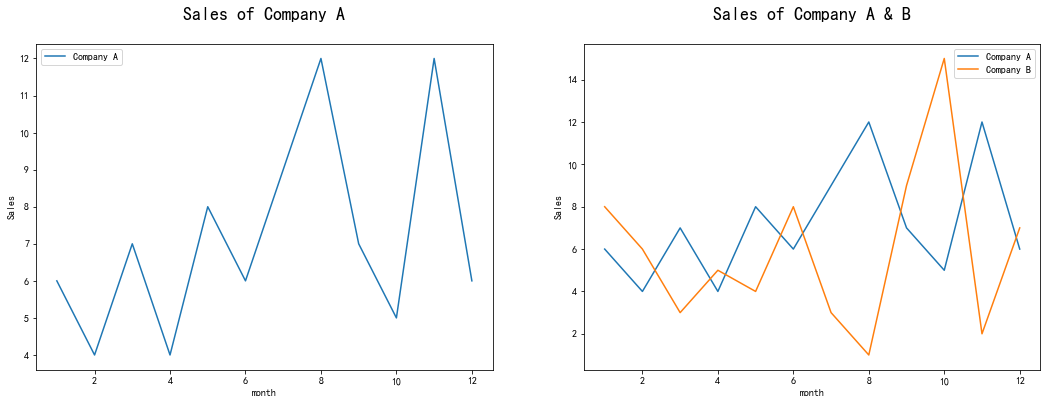

In [10]:
x = [1,2,3,4,5,6,7,8,9,10,11,12]
y = [6,4,7,4,8,6,9,12,7,5,12,6]

x1 = [1,2,3,4,5,6,7,8,9,10,11,12]
y1 = [8,6,3,5,4,8,3,1,9,15,2,7]

fig, ax = plt.subplots(1,2,figsize=(18,6))

# 折线图
ax[0].plot(x,y,label='Company A')

ax[0].set_title('Sales of Company A\n',fontsize=18)
ax[0].set_xlabel('month')
ax[0].set_ylabel('Sales')
ax[0].legend()

# 折线图-2
ax[1].plot(x,y,label='Company A')
ax[1].plot(x1,y1,label='Company B')

ax[1].set_title('Sales of Company A & B\n',fontsize=18)
ax[1].set_xlabel('month')
ax[1].set_ylabel('Sales')
ax[1].legend()

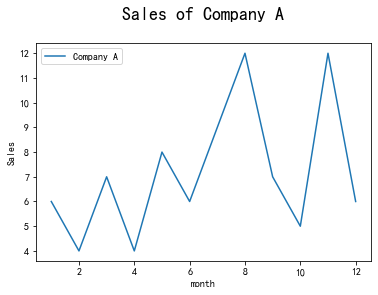

In [11]:
# 传统方法，以防万一，做个对比
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6,7,8,9,10,11,12]
y = [6,4,7,4,8,6,9,12,7,5,12,6]

# 折线图
plt.plot(x,y,label='Company A')

plt.title('Sales of Company A\n',fontsize=18)
plt.xlabel('month')
plt.ylabel('Sales')
plt.legend()

# 柱状图

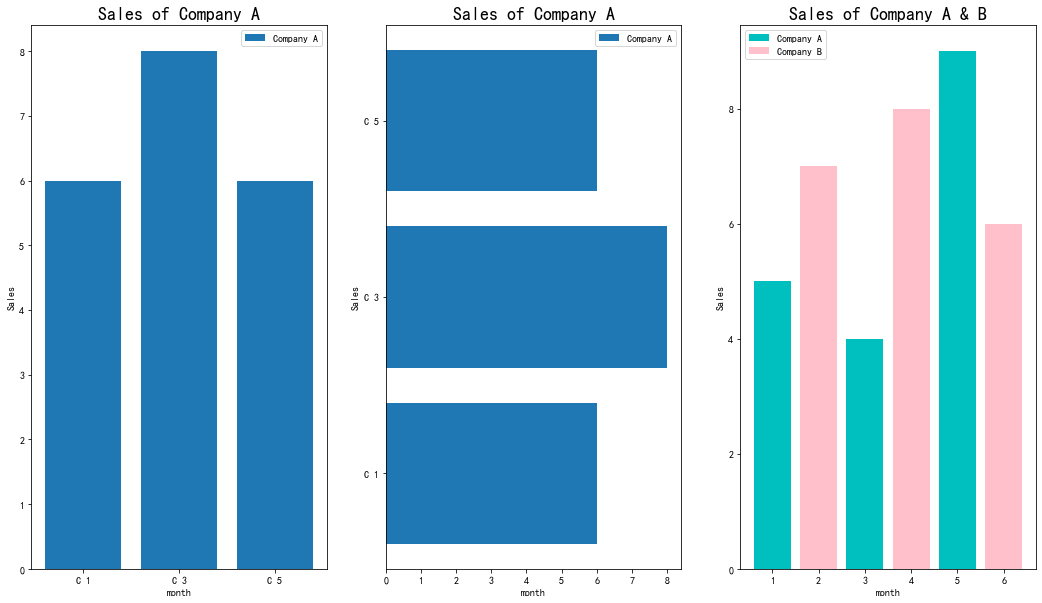

In [12]:
x = ['C 1','C 3','C 5']
y = [6,8,6]

fig, ax = plt.subplots(1,3,figsize=(18,10))

# 柱状图
ax[0].bar(x,y,label='Company A')

ax[0].set_title('Sales of Company A',fontsize=18)
ax[0].set_xlabel('month')
ax[0].set_ylabel('Sales')
ax[0].legend()

# 柱状图-3
ax[1].barh(x,y,label='Company A')

ax[1].set_title('Sales of Company A',fontsize=18)
ax[1].set_xlabel('month')
ax[1].set_ylabel('Sales')
ax[1].legend()

x1 = [1,3,5]
y1 = [5,4,9]

x2 = [2,4,6]
y2 = [7,8,6]

# 柱状图-2
ax[2].bar(x1,y1,label='Company A',color='c')
ax[2].bar(x2,y2,label='Company B',color='pink')

ax[2].set_title('Sales of Company A & B',fontsize=18)
ax[2].set_xlabel('month')
ax[2].set_ylabel('Sales')
ax[2].legend()



# 直方图


Text(0.5, 1.0, 'City Hist')

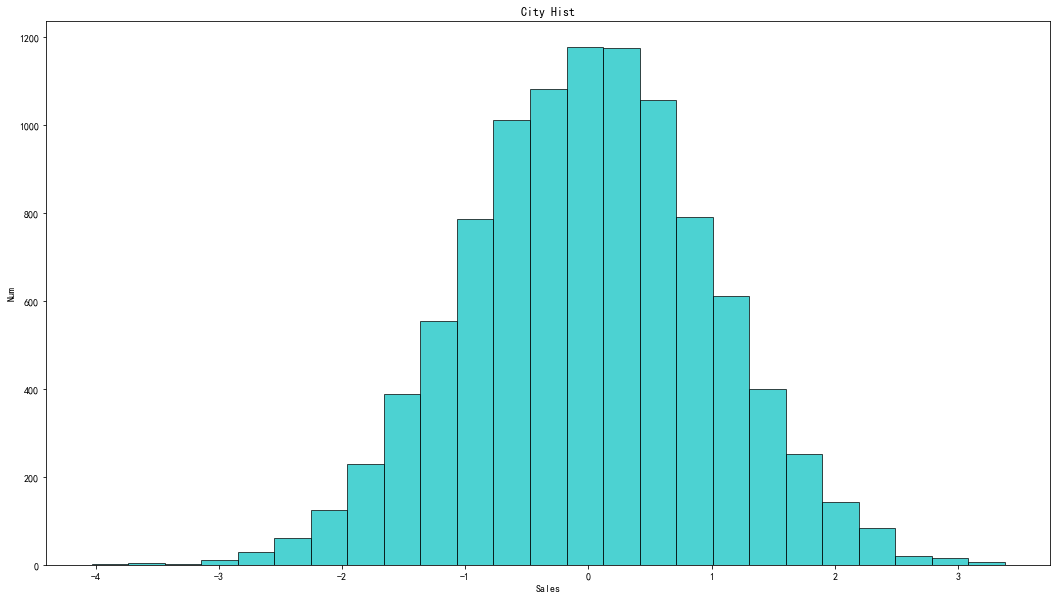

In [13]:
import matplotlib.pyplot as plt

# 随机生成（10000,）服从正态分布的数据
data = np.random.randn(10000)
"""
绘制直方图
data:必选参数，绘图数据
bins:直方图的长条形数目，可选项，默认为10
normed:是否将得到的直方图向量归一化，可选项，默认为0，代表不归一化，显示频数。normed=1，表示归一化，显示频率。
facecolor:长条形的颜色
edgecolor:长条形边框的颜色
alpha:透明度
"""
fig, ax = plt.subplots(figsize=(18,10))

ax.hist(data, bins=25, density=0, facecolor="c", edgecolor="black", alpha=0.7)
# 显示横轴标签
ax.set_xlabel("Sales")
# 显示纵轴标签
ax.set_ylabel("Num")
# 显示图标题
ax.set_title("City Hist")

# 散点图

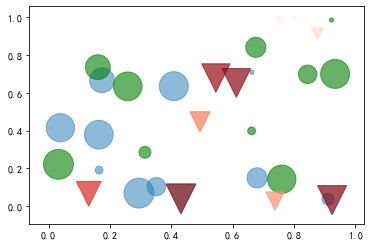

In [14]:
N = 10
x = np.random.rand(N)
y = np.random.rand(N)
x2 = np.random.rand(N)
y2 = np.random.rand(N)
x3 = np.random.rand(N)
y3 = np.random.rand(N)
area = np.random.rand(N) * 1000
fig = plt.figure()
ax = plt.subplot()
ax.scatter(x, y, s=area, alpha=0.5)
ax.scatter(x2, y2, s=area, c='green', alpha=0.6)
ax.scatter(x3, y3, s=area, c=area, marker='v', cmap='Reds', alpha=0.7)  # 更换标记样式，另一种颜色的样式

# 堆栈图

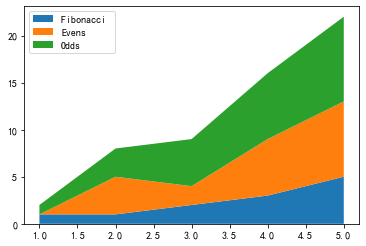

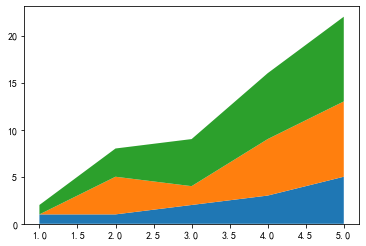

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y1 = [1, 1, 2, 3, 5]
y2 = [0, 4, 2, 6, 8]
y3 = [1, 3, 5, 7, 9]

y = np.vstack([y1, y2, y3])

labels = ["Fibonacci ", "Evens", "Odds"]

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, labels=labels)
ax.legend(loc='upper left')
plt.show()

fig, ax = plt.subplots()
ax.stackplot(x, y)
plt.show()

# 饼状图

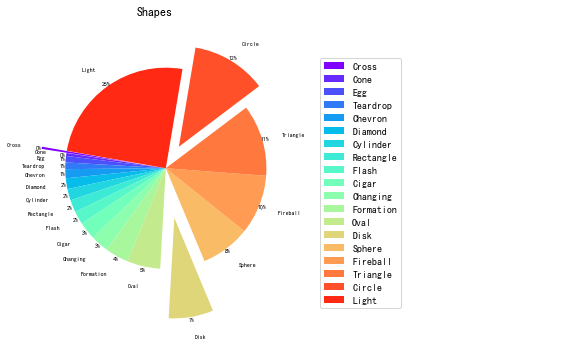

In [16]:

from matplotlib import font_manager as fm
from  matplotlib import cm

# 原始数据
shapes = ['Cross', 'Cone', 'Egg', 'Teardrop', 'Chevron', 'Diamond', 'Cylinder',
       'Rectangle', 'Flash', 'Cigar', 'Changing', 'Formation', 'Oval', 'Disk',
       'Sphere', 'Fireball', 'Triangle', 'Circle', 'Light']
values = [  287,   383,   842,   866,  1187,  1405,  1495,  1620,  1717,
        2313,  2378,  3070,  4332,  5841,  6482,  7785,  9358,  9818, 20254]

s = pd.Series(values, index=shapes)

labels = s.index
sizes = s.values
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0,0.2,0,0,0,0.1,0)  # "explode" ， show the selected slice

fig, axes = plt.subplots(figsize=(8,5),ncols=2) # 设置绘图区域大小
ax1, ax2 = axes.ravel()

colors = cm.rainbow(np.arange(len(sizes))/len(sizes)) # colormaps: Paired, autumn, rainbow, gray,spring,Darks
patches, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.0f%%',explode=explode,
        shadow=False, startangle=170, colors=colors, labeldistance=1.2,pctdistance=1.03, radius=0.4)
# labeldistance: 控制labels显示的位置
# pctdistance: 控制百分比显示的位置
# radius: 控制切片突出的距离

ax1.axis('equal')  

# 重新设置字体大小
proptease = fm.FontProperties()
proptease.set_size('xx-small')
# font size include: ‘xx-small’,x-small’,'small’,'medium’,‘large’,‘x-large’,‘xx-large’ or number, e.g. '12'
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)

ax1.set_title('Shapes', loc='center')

# ax2 只显示图例（legend）
ax2.axis('off')
ax2.legend(patches, labels, loc='center left')

plt.tight_layout()
# plt.savefig("pie_shape_ufo.png", bbox_inches='tight')
plt.savefig('Demo_project_final.jpg')
plt.show()

![](https://pptwinpics.oss-cn-beijing.aliyuncs.com/CDA%E8%AE%B2%E5%B8%88%E6%B0%B4%E5%8D%B0_20200314161940.png)


# 附加课

## 样式

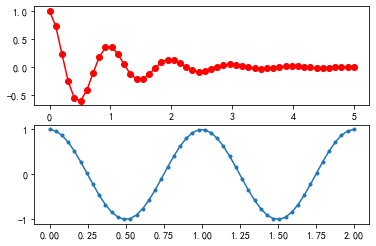

In [17]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
# "o-r"中r表示红色，o表示实点，-表示连接线
# 可以写成 ro- 或 or- 或 -or 顺序不要求
plt.plot(x1, y1, 'o-r')  


plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')

plt.show()

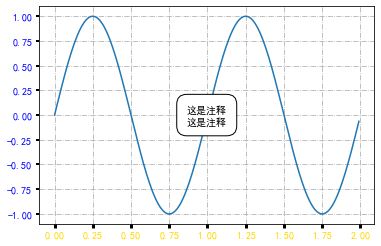

In [18]:
t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)
# 网格
ax.grid(True, linestyle='-.')
# 坐标
# ax.tick_params(axis='both',labelcolor='r', labelsize='medium', width=3)
ax.tick_params(axis='x',labelcolor='gold', labelsize='medium', width=3)
ax.tick_params(axis='y',labelcolor='b', labelsize='medium', width=2)

# 注释
ax.annotate("这是注释\n"
                 "这是注释", (0.5, 0.5),
                 xycoords="axes fraction", va="center", ha="center",
                 bbox=dict(boxstyle="round, pad=1", fc="w"))


plt.show()

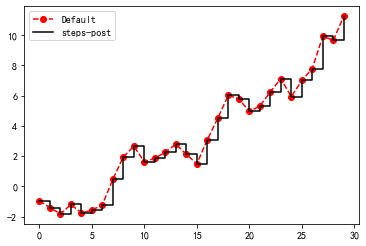

In [19]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'r--', label='Default',marker='o') 
# 写这步运行直接添加到上图中
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

## 使用内置样式

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


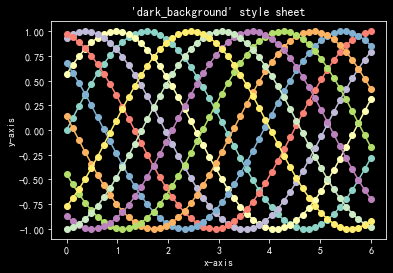

In [20]:
# 全部内置样式

from matplotlib import style
print(plt.style.available)

plt.style.use('dark_background')

fig, ax = plt.subplots()

L = 6
x = np.linspace(0, L)
ncolors = len(plt.rcParams['axes.prop_cycle'])
shift = np.linspace(0, L, ncolors, endpoint=False)
for s in shift:
    ax.plot(x, np.sin(x + s), 'o-')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title("'dark_background' style sheet")

plt.show()

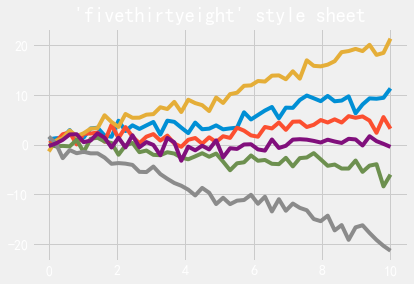

In [21]:
plt.style.use('fivethirtyeight')

x = np.linspace(0, 10)

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()

ax.plot(x, np.sin(x) + x + np.random.randn(50))
ax.plot(x, np.sin(x) + 0.5 * x + np.random.randn(50))
ax.plot(x, np.sin(x) + 2 * x + np.random.randn(50))
ax.plot(x, np.sin(x) - 0.5 * x + np.random.randn(50))
ax.plot(x, np.sin(x) - 2 * x + np.random.randn(50))
ax.plot(x, np.sin(x) + np.random.randn(50))
ax.set_title("'fivethirtyeight' style sheet")

plt.show()

## 线条及填充

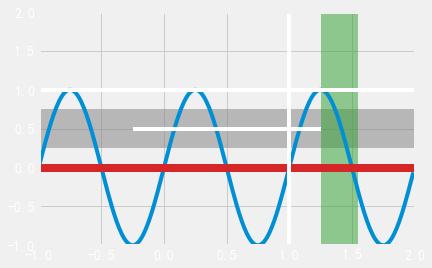

In [22]:
t = np.arange(-1, 2, .01)
s = np.sin(2 * np.pi * t)

#曲线
plt.plot(t, s)

# 以y轴0点画横线
plt.axhline(linewidth=8, color='#d62728')

# 画横线
plt.axhline(y=1)

# 画纵线
plt.axvline(x=1)

# Draw a thick blue vline at x=0 that spans the upper quadrant of the yrange
# plt.axvline(x=0, ymin=0.75, linewidth=8, color='#1f77b4')

# 画线段
plt.axhline(y=.5, xmin=0.25, xmax=0.75)

# 平行填充
plt.axhspan(0.25, 0.75, facecolor='0.5', alpha=0.5)

# 垂直填充
plt.axvspan(1.25, 1.55, facecolor='#2ca02c', alpha=0.5)

# 坐标轴
plt.axis([-1, 2, -1, 2])

plt.show()

## 交叉及填充

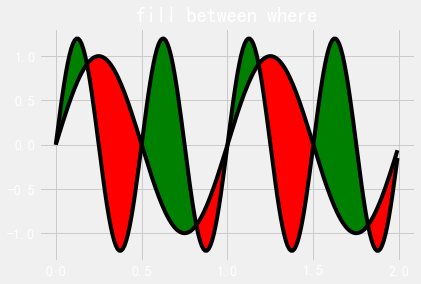

In [23]:
x = np.arange(0.0, 2, 0.01)
y1 = np.sin(2*np.pi*x)
y2 = 1.2*np.sin(4*np.pi*x)

fig, ax = plt.subplots()
ax.plot(x, y1, x, y2, color='black')
ax.fill_between(x, y1, y2, where=y2>y1, facecolor='green')
ax.fill_between(x, y1, y2, where=y2<=y1, facecolor='red')
ax.set_title('fill between where')

plt.show()


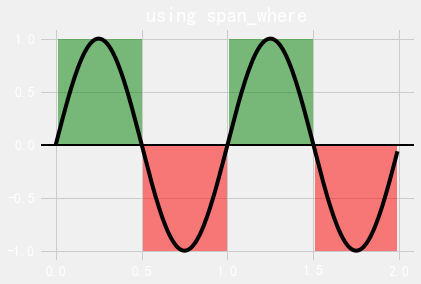

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as collections


t = np.arange(0.0, 2, 0.01)
s1 = np.sin(2*np.pi*t)
s2 = 1.2*np.sin(4*np.pi*t)


fig, ax = plt.subplots()
ax.set_title('using span_where')
ax.plot(t, s1, color='black')
ax.axhline(0, color='black', lw=2)

collection = collections.BrokenBarHCollection.span_where(
    t, ymin=0, ymax=1, where=s1 > 0, facecolor='green', alpha=0.5)
ax.add_collection(collection)

collection = collections.BrokenBarHCollection.span_where(
    t, ymin=-1, ymax=0, where=s1 < 0, facecolor='red', alpha=0.5)
ax.add_collection(collection)


plt.show()

## 图例

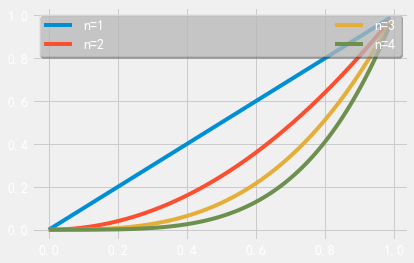

In [25]:
ax = plt.subplot(111)
t1 = np.arange(0.0, 1.0, 0.01)
for n in [1, 2, 3, 4]:
    plt.plot(t1, t1**n, label="n=%d"%(n,))

# plt.legend()
leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)


plt.show()

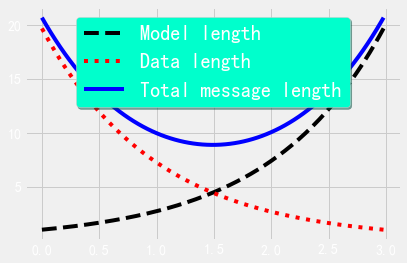

In [26]:
# Make some fake data.
a = b = np.arange(0, 3, .02)
c = np.exp(a)
d = c[::-1]

# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(a, c, 'k--', label='Model length')
ax.plot(a, d, 'r:', label='Data length')
ax.plot(a, c + d, 'b', label='Total message length')

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('#00FFCC')

plt.show()

## 颜色

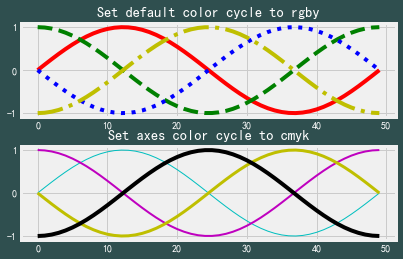

In [27]:
%matplotlib inline

from cycler import cycler
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 2 * np.pi)
offsets = np.linspace(0, 2*np.pi, 4, endpoint=False)
# Create array with shifted-sine curve along each column
yy = np.transpose([np.sin(x + phi) for phi in offsets])

# 1. Setting prop cycle on default rc parameter
plt.rc('lines', linewidth=4)
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y']) +
                           cycler('linestyle', ['-', '--', ':', '-.'])))
fig, (ax0, ax1) = plt.subplots(nrows=2, facecolor='darkslategray')
ax0.plot(yy)
ax0.set_title('Set default color cycle to rgby')

# 2. Define prop cycle for single set of axes
ax1.set_prop_cycle(cycler('color', ['c', 'm', 'y', 'k']) +
                   cycler('lw', [1, 2, 3, 4]))
ax1.plot(yy)
ax1.set_title('Set axes color cycle to cmyk')

# Tweak spacing between subplots to prevent labels from overlapping
fig.subplots_adjust(hspace=0.3)
plt.show()

## 标注

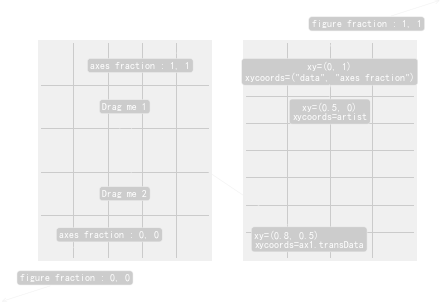

In [28]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
from matplotlib.text import OffsetFrom

fig, (ax1, ax2) = plt.subplots(1, 2)

bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")

# Here we'll demonstrate the extents of the coordinate system and how
# we place annotating text.

ax1.annotate('figure fraction : 0, 0', xy=(0, 0), xycoords='figure fraction',
             xytext=(20, 20), textcoords='offset points',
             ha="left", va="bottom",
             bbox=bbox_args,
             arrowprops=arrow_args)

ax1.annotate('figure fraction : 1, 1', xy=(1, 1), xycoords='figure fraction',
             xytext=(-20, -20), textcoords='offset points',
             ha="right", va="top",
             bbox=bbox_args,
             arrowprops=arrow_args)

ax1.annotate('axes fraction : 0, 0', xy=(0, 0), xycoords='axes fraction',
             xytext=(20, 20), textcoords='offset points',
             ha="left", va="bottom",
             bbox=bbox_args,
             arrowprops=arrow_args)

ax1.annotate('axes fraction : 1, 1', xy=(1, 1), xycoords='axes fraction',
             xytext=(-20, -20), textcoords='offset points',
             ha="right", va="top",
             bbox=bbox_args,
             arrowprops=arrow_args)

# It is also possible to generate draggable annotations

an1 = ax1.annotate('Drag me 1', xy=(.5, .7), xycoords='data',
                   #xytext=(.5, .7), textcoords='data',
                   ha="center", va="center",
                   bbox=bbox_args,
                   #arrowprops=arrow_args
                   )

an2 = ax1.annotate('Drag me 2', xy=(.5, .5), xycoords=an1,
                   xytext=(.5, .3), textcoords='axes fraction',
                   ha="center", va="center",
                   bbox=bbox_args,
                   arrowprops=dict(patchB=an1.get_bbox_patch(),
                                   connectionstyle="arc3,rad=0.2",
                                   **arrow_args))
an1.draggable()
an2.draggable()

an3 = ax1.annotate('', xy=(.5, .5), xycoords=an2,
                   xytext=(.5, .5), textcoords=an1,
                   ha="center", va="center",
                   bbox=bbox_args,
                   arrowprops=dict(patchA=an1.get_bbox_patch(),
                                   patchB=an2.get_bbox_patch(),
                                   connectionstyle="arc3,rad=0.2",
                                   **arrow_args))

# Finally we'll show off some more complex annotation and placement

text = ax2.annotate('xy=(0, 1)\nxycoords=("data", "axes fraction")',
                    xy=(0, 1), xycoords=("data", 'axes fraction'),
                    xytext=(0, -20), textcoords='offset points',
                    ha="center", va="top",
                    bbox=bbox_args,
                    arrowprops=arrow_args)

ax2.annotate('xy=(0.5, 0)\nxycoords=artist',
             xy=(0.5, 0.), xycoords=text,
             xytext=(0, -20), textcoords='offset points',
             ha="center", va="top",
             bbox=bbox_args,
             arrowprops=arrow_args)

ax2.annotate('xy=(0.8, 0.5)\nxycoords=ax1.transData',
             xy=(0.8, 0.5), xycoords=ax1.transData,
             xytext=(10, 10),
             textcoords=OffsetFrom(ax2.bbox, (0, 0), "points"),
             ha="left", va="bottom",
             bbox=bbox_args,
             arrowprops=arrow_args)

ax2.set(xlim=[-2, 2], ylim=[-2, 2])
plt.show()

[(-20, 20), (-20, 20)]

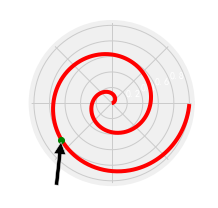

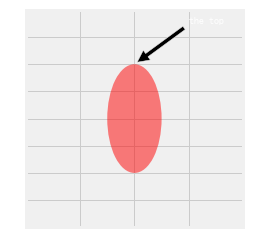

In [29]:
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'), figsize=(3, 3))
r = np.arange(0, 1, 0.001)
theta = 2*2*np.pi*r
line, = ax.plot(theta, r)

ind = 800
thisr, thistheta = r[ind], theta[ind]
ax.plot([thistheta], [thisr], 'o')
ax.annotate('a polar annotation',
            xy=(thistheta, thisr),  # theta, radius
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom')

# You can also use polar notation on a cartesian axes.  Here the native
# coordinate system ('data') is cartesian, so you need to specify the
# xycoords and textcoords as 'polar' if you want to use (theta, radius).

el = Ellipse((0, 0), 10, 20, facecolor='r', alpha=0.5)

fig, ax = plt.subplots(subplot_kw=dict(aspect='equal'))
ax.add_artist(el)
el.set_clip_box(ax.bbox)
ax.annotate('the top',
            xy=(np.pi/2., 10.),      # theta, radius
            xytext=(np.pi/3, 20.),   # theta, radius
            xycoords='polar',
            textcoords='polar',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom',
            clip_on=True)  # clip to the axes bounding box

ax.set(xlim=[-20, 20], ylim=[-20, 20])

[(-5, 3), (-1, 5)]

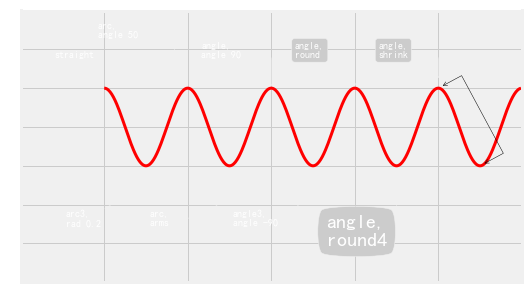

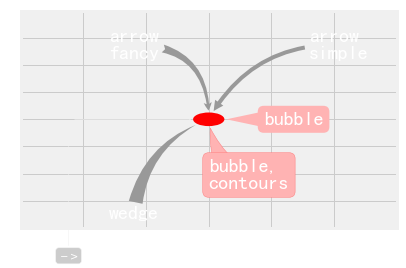

In [30]:
fig, ax = plt.subplots(figsize=(8, 5))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=3)

ax.annotate('straight',
            xy=(0, 1), xycoords='data',
            xytext=(-50, 30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('arc3,\nrad 0.2',
            xy=(0.5, -1), xycoords='data',
            xytext=(-80, -60), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=.2"))

ax.annotate('arc,\nangle 50',
            xy=(1., 1), xycoords='data',
            xytext=(-90, 50), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc,angleA=0,armA=50,rad=10"))

ax.annotate('arc,\narms',
            xy=(1.5, -1), xycoords='data',
            xytext=(-80, -60), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc,angleA=0,armA=40,angleB=-90,armB=30,rad=7"))

ax.annotate('angle,\nangle 90',
            xy=(2., 1), xycoords='data',
            xytext=(-70, 30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))

ax.annotate('angle3,\nangle -90',
            xy=(2.5, -1), xycoords='data',
            xytext=(-80, -60), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('angle,\nround',
            xy=(3., 1), xycoords='data',
            xytext=(-60, 30), textcoords='offset points',
            bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))

ax.annotate('angle,\nround4',
            xy=(3.5, -1), xycoords='data',
            xytext=(-70, -80), textcoords='offset points',
            size=20,
            bbox=dict(boxstyle="round4,pad=.5", fc="0.8"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=-90,rad=10"))

ax.annotate('angle,\nshrink',
            xy=(4., 1), xycoords='data',
            xytext=(-60, 30), textcoords='offset points',
            bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="->",
                            shrinkA=0, shrinkB=10,
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))

# You can pass an empty string to get only annotation arrows rendered
ann = ax.annotate('', xy=(4., 1.), xycoords='data',
                  xytext=(4.5, -1), textcoords='data',
                  arrowprops=dict(arrowstyle="<->",
                                  connectionstyle="bar",
                                  ec="k",
                                  shrinkA=5, shrinkB=5))

ax.set(xlim=(-1, 5), ylim=(-4, 3))

# We'll create another figure so that it doesn't get too cluttered
fig, ax = plt.subplots()

el = Ellipse((2, -1), 0.5, 0.5)
ax.add_patch(el)

ax.annotate('$->$',
            xy=(2., -1), xycoords='data',
            xytext=(-150, -140), textcoords='offset points',
            bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="->",
                            patchB=el,
                            connectionstyle="angle,angleA=90,angleB=0,rad=10"))

ax.annotate('arrow\nfancy',
            xy=(2., -1), xycoords='data',
            xytext=(-100, 60), textcoords='offset points',
            size=20,
            # bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            patchB=el,
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('arrow\nsimple',
            xy=(2., -1), xycoords='data',
            xytext=(100, 60), textcoords='offset points',
            size=20,
            # bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="simple",
                            fc="0.6", ec="none",
                            patchB=el,
                            connectionstyle="arc3,rad=0.3"))

ax.annotate('wedge',
            xy=(2., -1), xycoords='data',
            xytext=(-100, -100), textcoords='offset points',
            size=20,
            # bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="wedge,tail_width=0.7",
                            fc="0.6", ec="none",
                            patchB=el,
                            connectionstyle="arc3,rad=-0.3"))

ann = ax.annotate('bubble,\ncontours',
                  xy=(2., -1), xycoords='data',
                  xytext=(0, -70), textcoords='offset points',
                  size=20,
                  bbox=dict(boxstyle="round",
                            fc=(1.0, 0.7, 0.7),
                            ec=(1., .5, .5)),
                  arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                                  fc=(1.0, 0.7, 0.7), ec=(1., .5, .5),
                                  patchA=None,
                                  patchB=el,
                                  relpos=(0.2, 0.8),
                                  connectionstyle="arc3,rad=-0.1"))

ann = ax.annotate('bubble',
                  xy=(2., -1), xycoords='data',
                  xytext=(55, 0), textcoords='offset points',
                  size=20, va="center",
                  bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"),
                  arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                                  fc=(1.0, 0.7, 0.7), ec="none",
                                  patchA=None,
                                  patchB=el,
                                  relpos=(0.2, 0.5)))

ax.set(xlim=(-1, 5), ylim=(-5, 3))

## Mac 中文显示问题

![](https://pptwinpics.oss-cn-beijing.aliyuncs.com/CDA%E8%AE%B2%E5%B8%88%E6%B0%B4%E5%8D%B0_20200314161940.png)
